In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')
DATASET_DIRECTORY = '/content/drive/MyDrive/dataset/'
!ls /content/drive/MyDrive/dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Merged01.csv  Merged02.csv  Merged03.csv  Merged04.csv	Merged05.csv


In [ ]:
# List all CSV files in the dataset directory
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

# Split the dataset into training and test sets
training_sets = df_sets[:int(len(df_sets)*.8)]
test_sets = df_sets[int(len(df_sets)*.8):]


In [ ]:
# Features and target column
X_columns = [
    'Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate', 'fin_flag_number', 'syn_flag_number',
    'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number',
    'ack_count', 'syn_count', 'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG',
    'Std', 'Tot size', 'IAT', 'Number', 'Variance'
]
y_column = 'Label'


In [ ]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Train the Random Forest Model
for train_set in tqdm(training_sets):

    d = pd.read_csv(DATASET_DIRECTORY + train_set)

    d.columns = d.columns.str.strip()

    if d[X_columns].isna().sum().sum() > 0:
        print(f"Missing values found in {train_set}, filling with mean...")
        d[X_columns] = d[X_columns].fillna(d[X_columns].mean())

    d[X_columns] = d[X_columns].replace([np.inf, -np.inf], np.nan)
    if d[X_columns].isna().sum().sum() > 0:
        print(f"NaN values after replacement in {train_set}, filling with mean...")
        d[X_columns] = d[X_columns].fillna(d[X_columns].mean())

    scaler.fit(d[X_columns])
    d[X_columns] = scaler.transform(d[X_columns])

    X_train = d[X_columns]
    y_train = d[y_column]

    rf_model.fit(X_train, y_train)
    del d

  0%|          | 0/4 [00:00<?, ?it/s]

Missing values found in Merged01.csv, filling with mean...
NaN values after replacement in Merged01.csv, filling with mean...


 25%|██▌       | 1/4 [03:53<11:39, 233.22s/it]

Missing values found in Merged02.csv, filling with mean...
NaN values after replacement in Merged02.csv, filling with mean...


 50%|█████     | 2/4 [07:58<08:00, 240.13s/it]

Missing values found in Merged03.csv, filling with mean...
NaN values after replacement in Merged03.csv, filling with mean...


 75%|███████▌  | 3/4 [11:47<03:55, 235.01s/it]

Missing values found in Merged04.csv, filling with mean...
NaN values after replacement in Merged04.csv, filling with mean...


100%|██████████| 4/4 [15:09<00:00, 227.49s/it]


In [ ]:

y_test = []
preds = []

# Iterate through test sets
for test_set in tqdm(test_sets):

    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)

    d_test.columns = d_test.columns.str.strip()

    if d_test[X_columns].isna().sum().sum() > 0:
        print(f"Missing values found in {test_set}, filling with mean...")
        d_test[X_columns] = d_test[X_columns].fillna(d_test[X_columns].mean())

    d_test[X_columns] = d_test[X_columns].replace([np.inf, -np.inf], np.nan)
    if d_test[X_columns].isna().sum().sum() > 0:
        print(f"NaN values after replacement in {test_set}, filling with mean...")
        d_test[X_columns] = d_test[X_columns].fillna(d_test[X_columns].mean())

    d_test[X_columns] = scaler.transform(d_test[X_columns])

    y_test += list(d_test[y_column].values)

    y_pred = rf_model.predict(d_test[X_columns])
    preds += list(y_pred)  # Store the predictions

    del d_test  # Clean up memory after each test dataset

  0%|          | 0/1 [00:00<?, ?it/s]

Missing values found in Merged05.csv, filling with mean...
NaN values after replacement in Merged05.csv, filling with mean...


100%|██████████| 1/1 [00:46<00:00, 46.33s/it]


In [ ]:
print(f"Performance of RandomForestClassifier:")

accuracy = accuracy_score(y_test, preds)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Print the classification report
print(f"Classification Report:\n{classification_report(y_test, preds)}")


Performance of RandomForestClassifier:
Random Forest Accuracy: 0.7767
Classification Report:
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.33      0.04      0.07        54
                 BENIGN       0.77      0.91      0.84     17566
       BROWSERHIJACKING       0.48      0.11      0.19        87
       COMMANDINJECTION       0.88      0.19      0.31        81
 DDOS-ACK_FRAGMENTATION       0.99      0.99      0.99      4547
        DDOS-HTTP_FLOOD       0.83      0.65      0.73       464
        DDOS-ICMP_FLOOD       1.00      1.00      1.00    114732
DDOS-ICMP_FRAGMENTATION       0.98      0.98      0.98      7245
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00     64770
       DDOS-RSTFINFLOOD       1.00      1.00      1.00     63886
         DDOS-SLOWLORIS       0.66      0.86      0.75       377
DDOS-SYNONYMOUSIP_FLOOD       0.53      0.53      0.53     56941
         DDOS-SYN_FLOOD       0.50      0.53      0.52     64

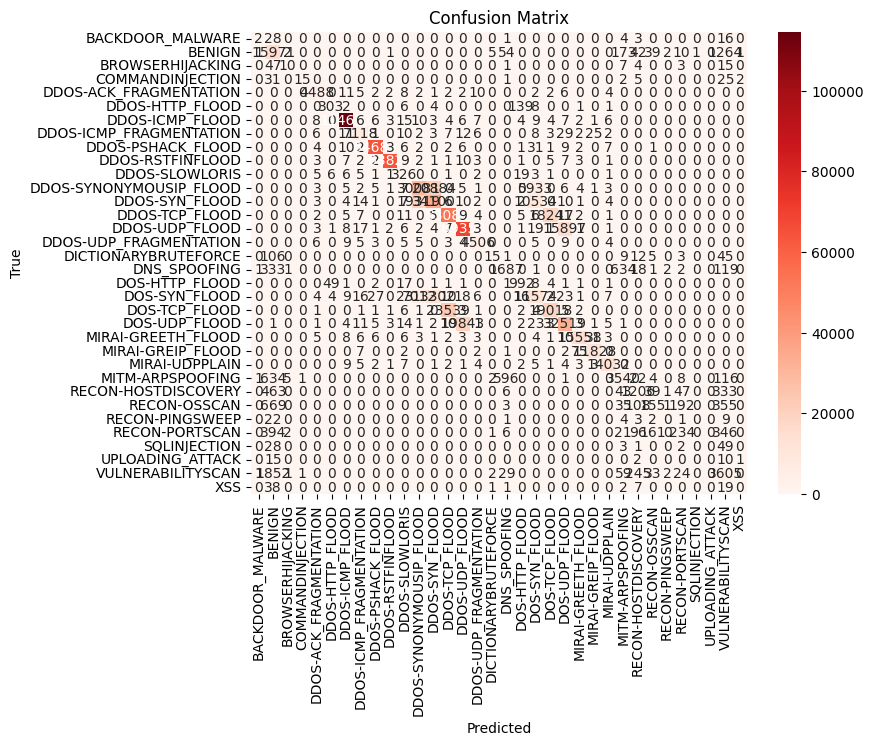

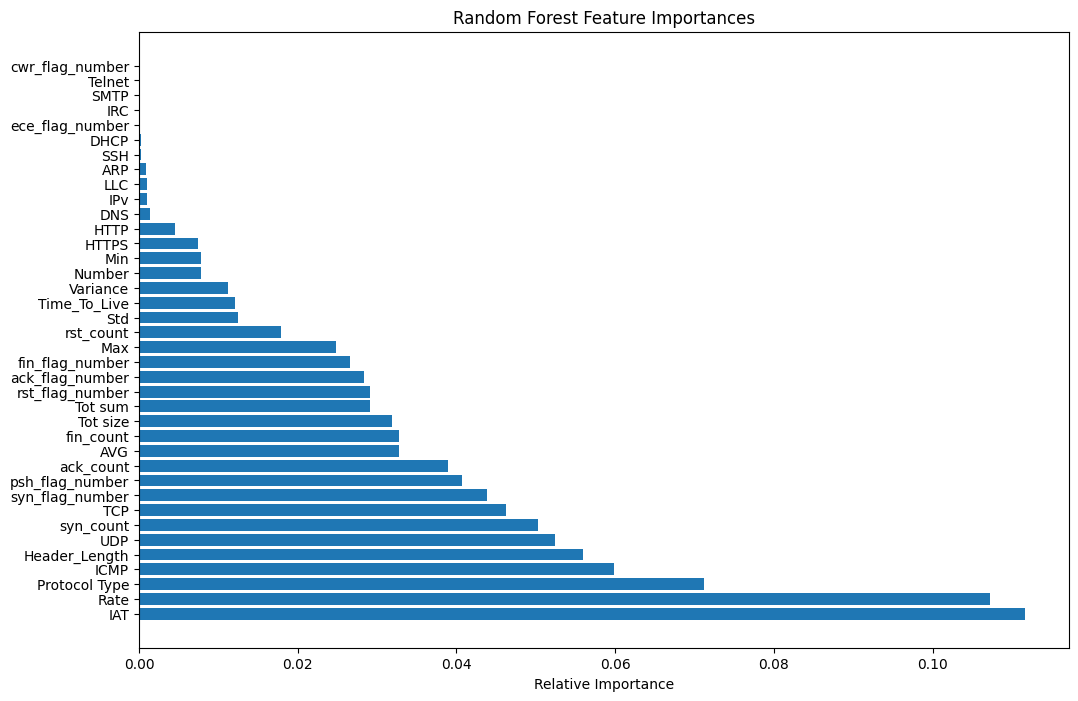

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
##sns.violinplot(df, x='dataset',y='perfshare',hue='memory',split=True, hue_order=[True,False], palette="flare")
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the features by importance

plt.figure(figsize=(12, 8))
plt.title("Random Forest Feature Importances")
plt.barh(range(len(X_columns)), importances[indices], align="center")
plt.yticks(range(len(X_columns)), np.array(X_columns)[indices])
plt.xlabel("Relative Importance")
plt.show()
